C:\Users\Pia\AppData\Local\Temp\ipykernel_19384\1882546426.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["event_interval"] = (data["eksd"] - data["prev_eksd"]).dt.days


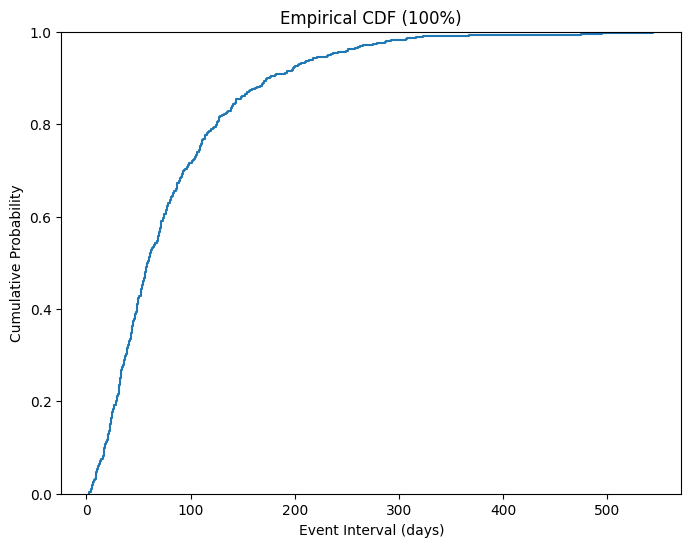

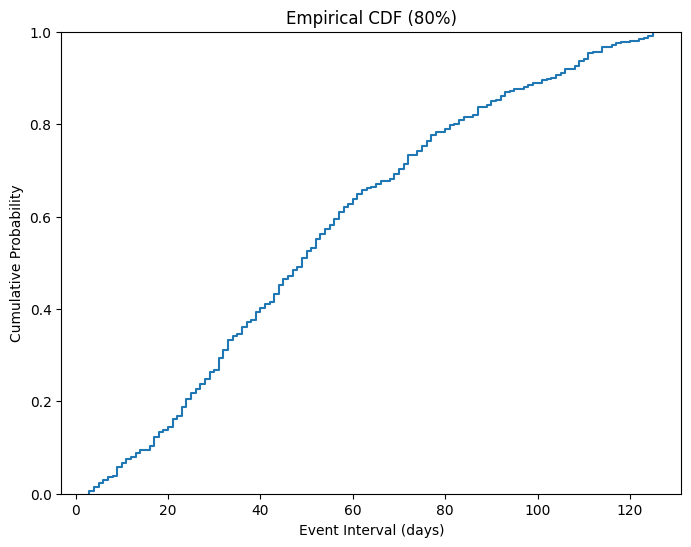

K-means Clustering Summary:
                count       mean        std   min    25%   50%    75%    max
Cluster_KMeans                                                              
0               136.0  30.860294   8.744245  16.0  23.75  31.0  38.25   46.0
1               191.0  77.324607  22.516646  47.0  57.00  74.0  93.00  125.0
2                34.0   8.529412   3.277428   3.0   6.00   9.0  11.00   14.0
OPTICS Clustering Summary:
                count        mean        std   min    25%    50%    75%    max
Cluster_OPTICS                                                                
-1              309.0   44.883495  25.244120   3.0  25.00   43.0   61.0  125.0
 0               52.0  103.596154   9.040778  89.0  94.75  105.0  111.0  120.0
Silhouette Score (K-means): 0.5744639972777158
Silhouette Score (OPTICS): 0.23804312858422197


c:\Users\Pia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


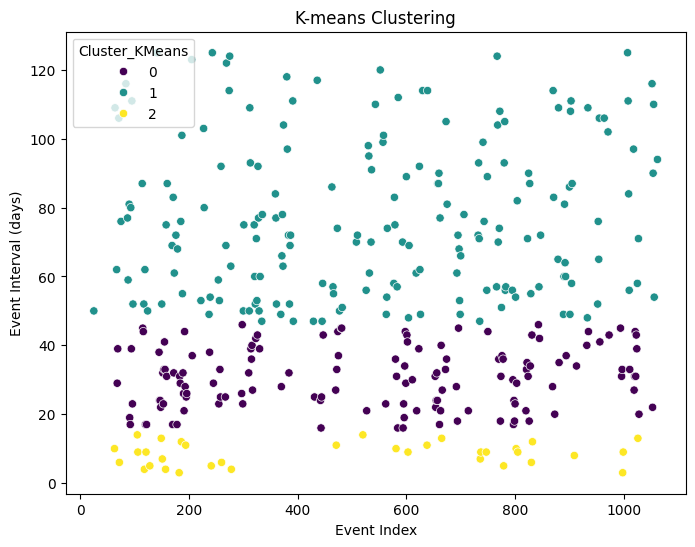

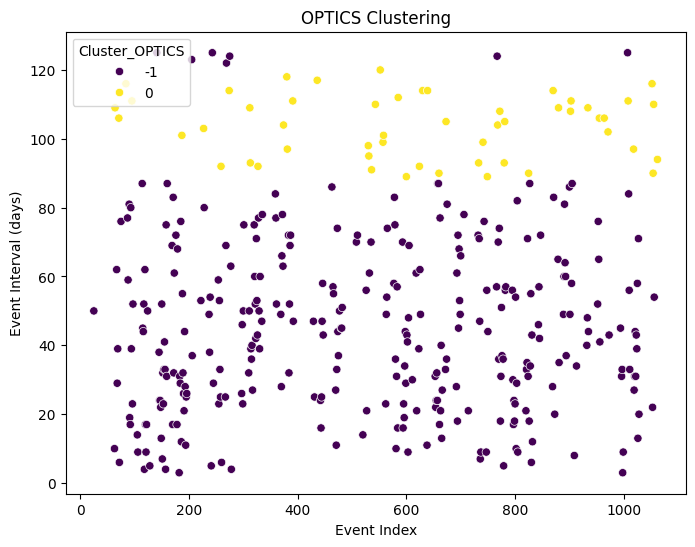

C:\Users\Pia\AppData\Local\Temp\ipykernel_19384\1882546426.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["event_interval"] = (data["eksd"] - data["prev_eksd"]).dt.days


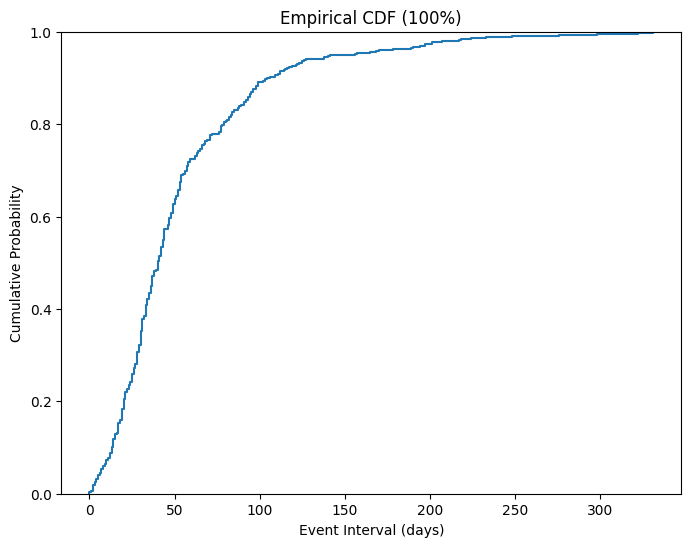

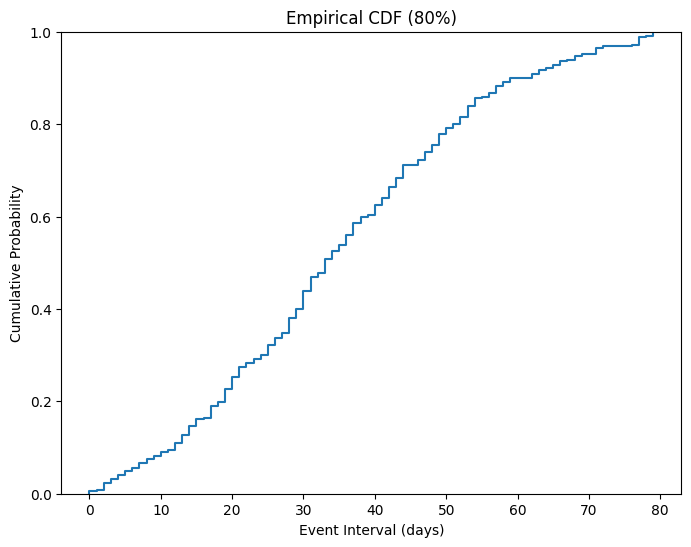

C:\Users\Pia\AppData\Local\Temp\ipykernel_19384\1882546426.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster_KMeans"] = kmeans.fit_predict(X)
c:\Users\Pia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Pia\AppData\Local\Temp\ipykernel_19384\1882546426.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster_OPTICS"] = op

K-means Clustering Summary:
                count       mean        std   min    25%   50%    75%   max
Cluster_KMeans                                                             
0               135.0  22.148148   6.418860  10.0  17.00  22.0  28.00  31.0
1               184.0  49.130435  12.567820  32.0  39.75  47.0  56.25  79.0
2                26.0   4.961538   2.473552   1.0   3.00   5.0   7.00   9.0
OPTICS Clustering Summary:
                count       mean        std   min   25%   50%   75%   max
Cluster_OPTICS                                                           
-1              280.0  31.396429  18.367514   1.0  19.0  30.0  40.0  79.0
 0               65.0  51.815385   3.823825  46.0  49.0  52.0  54.0  59.0
Silhouette Score (K-means): 0.5598557066840106
Silhouette Score (OPTICS): 0.09017277281564647


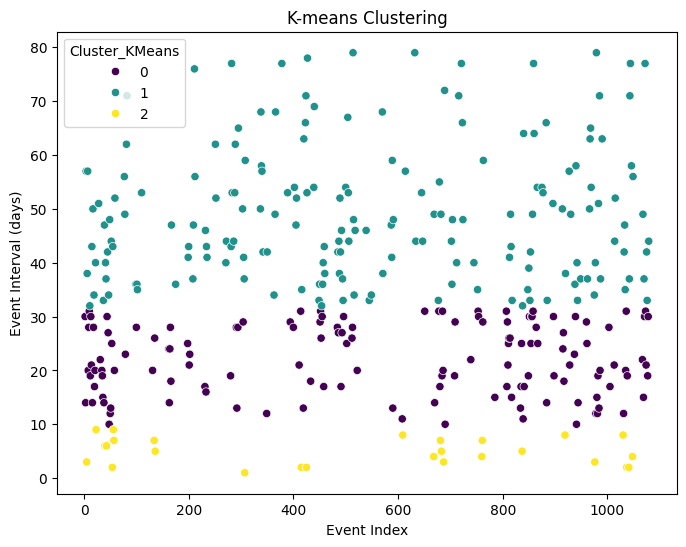

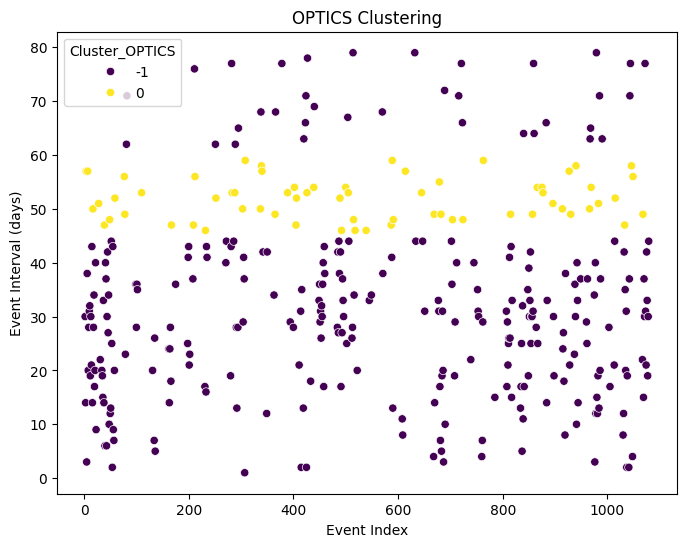

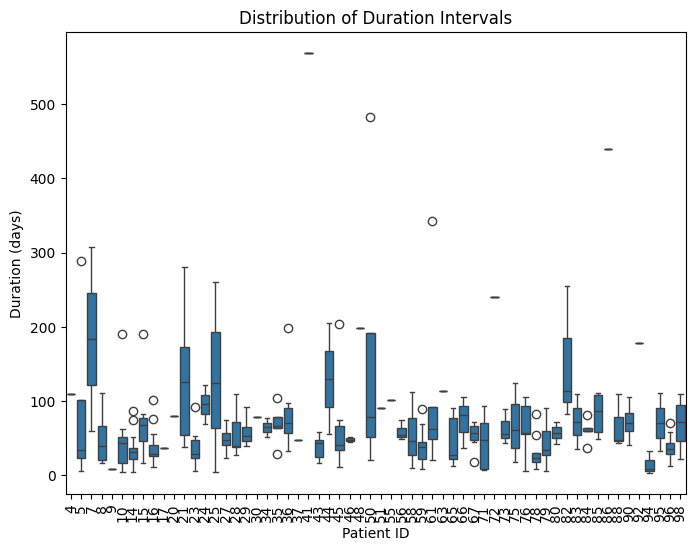

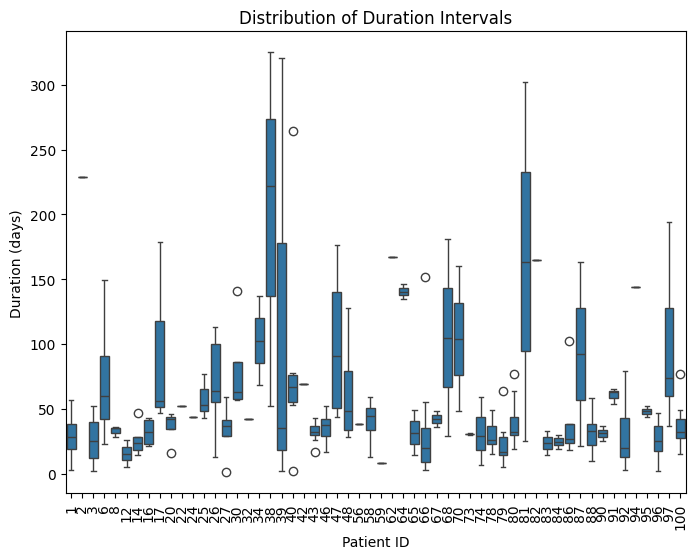

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, OPTICS
from sklearn.metrics import silhouette_score

# Load the dataset from the CSV file
med_events = pd.read_csv("C:\\Users\\Pia\\Desktop\\Sessa Empirical Estimator\\med_events.csv")

# Assuming med_events is already defined and loaded
ExamplePats = med_events.copy()
ExamplePats.columns = ["pnr", "eksd", "perday", "ATC", "dur_original"]
ExamplePats["eksd"] = pd.to_datetime(ExamplePats["eksd"])

def filter_and_sort_data(data, atc_code):
    """Filter data for the specific ATC code and sort by patient ID and event date."""
    filtered_data = data[data["ATC"] == atc_code]
    return filtered_data.sort_values(by=["pnr", "eksd"])

def calculate_event_intervals(data):
    """Calculate the interval between consecutive events in days."""
    data["prev_eksd"] = data.groupby("pnr")["eksd"].shift(1)
    data = data.dropna()  # Drop rows with no previous event
    data["event_interval"] = (data["eksd"] - data["prev_eksd"]).dt.days
    return data

def plot_ecdf(data, title):
    """Plot the Empirical CDF of event intervals."""
    plt.figure(figsize=(8, 6))
    sns.ecdfplot(data["event_interval"])
    plt.title(title)
    plt.xlabel("Event Interval (days)")
    plt.ylabel("Cumulative Probability")
    plt.show()

def filter_data_by_percentile(data, percentile):
    """Filter data to retain a certain percentile of the ECDF."""
    threshold = np.percentile(data["event_interval"], percentile)
    return data[data["event_interval"] <= threshold]

def log_transform_data(data):
    """Apply log transformation to positive event intervals."""
    positive_intervals = data[data["event_interval"] > 0]
    if len(positive_intervals) == 0:
        raise ValueError("No positive event intervals found after filtering. Cannot perform clustering.")
    return np.log(positive_intervals[["event_interval"]]), positive_intervals

def perform_kmeans_clustering(X, data, n_clusters=3):
    """Perform K-means clustering and add cluster labels to the data."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    data["Cluster_KMeans"] = kmeans.fit_predict(X)
    return data, kmeans

def perform_optics_clustering(X, data):
    """Perform OPTICS clustering and add cluster labels to the data."""
    optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)  # Adjust parameters as needed
    data["Cluster_OPTICS"] = optics.fit_predict(X)
    return data, optics

def calculate_silhouette_score(X, labels):
    """Calculate the silhouette score for clustering."""
    return silhouette_score(X, labels)

def plot_clusters(data, cluster_column, title):
    """Visualize clusters using a scatter plot."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data.index, y=data["event_interval"], hue=data[cluster_column], palette="viridis")
    plt.title(title)
    plt.xlabel("Event Index")
    plt.ylabel("Event Interval (days)")
    plt.show()

def summarize_clusters(data, cluster_column):
    """Generate summary statistics for clusters."""
    return data.groupby(cluster_column)["event_interval"].describe()

def see_assumption(data):
    """Analyze and visualize the distribution of duration intervals."""
    data = data.sort_values(by=["pnr", "eksd"])
    data["prev_eksd"] = data.groupby("pnr")["eksd"].shift(1)
    data = data.dropna()
    data["Duration"] = (data["eksd"] - data["prev_eksd"]).dt.days
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data["pnr"], y=data["Duration"])
    plt.xticks(rotation=90)
    plt.title("Distribution of Duration Intervals")
    plt.xlabel("Patient ID")
    plt.ylabel("Duration (days)")
    plt.show()
    
    return data

def See(arg1):
    """Main function to analyze event intervals and perform clustering."""
    C09CA01 = filter_and_sort_data(ExamplePats, arg1)
    C09CA01 = calculate_event_intervals(C09CA01)
    
    plot_ecdf(C09CA01, "Empirical CDF (100%)")
    filtered_data = filter_data_by_percentile(C09CA01, 80)
    plot_ecdf(filtered_data, "Empirical CDF (80%)")
    
    X, positive_intervals = log_transform_data(filtered_data)
    
    positive_intervals, kmeans = perform_kmeans_clustering(X, positive_intervals)
    positive_intervals, optics = perform_optics_clustering(X, positive_intervals)
    
    print("K-means Clustering Summary:")
    print(summarize_clusters(positive_intervals, "Cluster_KMeans"))
    
    print("OPTICS Clustering Summary:")
    print(summarize_clusters(positive_intervals, "Cluster_OPTICS"))
    
    print(f"Silhouette Score (K-means): {calculate_silhouette_score(X, positive_intervals['Cluster_KMeans'])}")
    print(f"Silhouette Score (OPTICS): {calculate_silhouette_score(X, positive_intervals['Cluster_OPTICS'])}")
    
    plot_clusters(positive_intervals, "Cluster_KMeans", "K-means Clustering")
    plot_clusters(positive_intervals, "Cluster_OPTICS", "OPTICS Clustering")
    
    return positive_intervals

# Running the functions
try:
    medA = See("medA")
    medB = See("medB")

    see_assumption(medA)
    see_assumption(medB)
except ValueError as e:
    print(f"Error: {e}")